Statsmodels:

[https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

Exercises:

https://saylordotorg.github.io/text_introductory-statistics/

In [1]:
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy import stats
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Example 1 (one sample)** 

The principal of a school claimed that its students are more intelligent than the average school. On calculating the IQ scores of 20 students, the average turns out to be 101. The mean of the population IQ is 100 and the standard deviation is 15. State whether the claim of principal is right or not at a 5% significance level.

In [76]:
null_mean = 101
std = 15

In [77]:
sample_size = 20
sample_mean = 101
data = np.random.normal(loc = sample_mean, scale = std/np.sqrt(sample_size), size=sample_size)

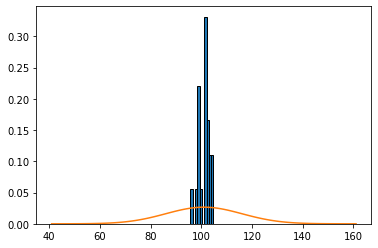

In [78]:
plt.hist(data, edgecolor='black', density=True)
x = np.linspace(null_mean-4*std, null_mean+4*std, 100)
plt.plot(x, stats.norm.pdf(x, loc=null_mean, scale=std))

In [79]:
alpha = 0.05 

z_score, p_value = ztest(data, value = null_mean, alternative='larger')
print(f"z_score: {np.round(z_score, 2)}, p_value: {np.round(p_value, 2)}")

print("Reject null hypotesis") if (p_value < alpha) else print("Fail to reject null hypotesis")


z_score: 0.02, p_value: 0.49
Fail to reject null hypotesis


#### **Example 2 (two samples)**
Can I state that men are taller than women with a significance of 0.001 (the corresponding confidence level is 99.9%)?

In [11]:
# Generate sample

sample_size = 1000

men_sample = np.random.normal(loc=177, scale=7, size=sample_size) # media italiana per diciottenni del 2000
women_sample = np.random.normal(loc=164, scale=7, size=sample_size)

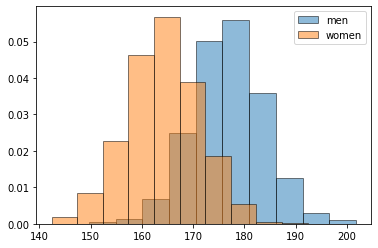

In [86]:
# Plot sample

plt.hist(men_sample, edgecolor='black', alpha=0.5, label='men', density=True)
plt.hist(women_sample, edgecolor='black', alpha=0.5, label='women', density=True)
#plt.hist(np.concatenate((men_sample, women_sample)), edgecolor='black', alpha=1, label='total', density=True)
plt.legend()

In [87]:
alpha = 0.001

# two sample test
z_score, p_value = ztest(x1=men_sample, x2=women_sample, value=0, alternative='larger')
print(f"z_score: {np.round(z_score, 2)}, p_value: {np.round(p_value, 2)}")

print("Reject null hypotesis") if (p_value < alpha) else print("Fail to reject null hypotesis")


z_score: 40.613551335018556, p_value: 0.0
Reject null hypotesis


#### **Example 3 (proportion problem)**

[https://www.drdawnwright.com/no-standard-deviation-how-do-i-get-the-standardized-test-statistic/](https://www.drdawnwright.com/no-standard-deviation-how-do-i-get-the-standardized-test-statistic/)

In a sample of 1000 home buyers, you find that 457 home buyers found their real estate agent through a friend. At α=0.08, can you reject the claim that 50% of home buyers find their real estate agent through a friend?

In [7]:
# Defining null hypotesis
p = 0.5

In [9]:
sample_size = 1000
n_positive = 457
sample = np.array([1]*n_positive + [0]*(sample_size - n_positive))
p_hat = sample.mean()
sample_std = np.sqrt(p*(1-p)/sample_size)

In [12]:
p_hat

0.457

In [17]:
alpha = 0.08

# one sample test
z_score, p_value = ztest(sample, value=0.5, alternative='two-sided')
print(f"z_score: {np.round(z_score, 2)}, p_value: {np.round(p_value, 2)}")

print("Reject null hypotesis") if (p_value < alpha) else print("Fail to reject null hypotesis")

z_score: -2.73, p_value: 0.01
Reject null hypotesis
